In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white') # Para lavar el estilo de seaborn

In [2]:
df = pd.read_csv('train.csv')

#### Información general del set de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


#### Muestra aleatoria del set de datos

In [4]:
df.sample(5)

,id,keyword,location,text,target
6554,9377,survived,Reading a romance novel,I Survived A 12-Step Program for Sex Addiction...,0
6902,9894,traumatised,Stage with Trey Songz,A spider has legit just run across my chest. T...,0
5924,8457,screamed,NaN,I ran with earbuds in which I now realize mean...,0
889,1287,bloody,Dime's Palace,I'm over here listening to Bloody Jay. ???? h...,0
5945,8491,screamed,NaN,i dont even remember slsp happening i just rem...,0


#### Descripción de variables estadísticas del set de datos

In [5]:
df.describe(include=[np.object, np.number]).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,7613,NaN,NaN,NaN,5441.93,3137.12,1,2734,5408,8146,10873
keyword,7552,221,fatalities,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,5080,3341,USA,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,7613,7503,11-Year-Old Boy Charged With Manslaughter of T...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,7613,NaN,NaN,NaN,0.42966,0.49506,0,0,0,1,1


#### Conversión de tipos de datos

- `id` toma valores del rango `[1, 10873]`, entonces puede usarse el tipo `uint16`.
- `target` puede ser `0` ó `1`.

In [6]:
df['id'] = df['id'].astype(np.uint16)
df['target'] = df['target'].astype(np.uint8)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   uint16
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   uint8 
dtypes: object(3), uint16(1), uint8(1)
memory usage: 200.9+ KB


#### Verificación de duplicados

In [7]:
len(df.drop_duplicates())

7613

No hay filas duplicadas

# Análisis Exploratorio

En este análisis se intentará encontrar la relación entre las keyword y los target.

In [8]:
#Cantidad de filas del dataframe
len(df)

7613

In [9]:
#Cantidad de filas del dataframe con keywords
df["keyword"].count()

7552

In [10]:
#Porcentaje de filas con keyword respecto al total
round(df["keyword"].count()/len(df)*100, 2)

99.2

In [11]:
#Cantidad de valores diferentes de keyword junto con su frecuencia
df["keyword"].value_counts()

fatalities               45
armageddon               42
deluge                   42
harm                     41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [12]:
#Cantidad de apariciones de cada keyword en el target 1
k1 = df[df["target"]==1]["keyword"].value_counts()
k1

derailment     39
outbreak       39
wreckage       39
oil%20spill    37
debris         37
               ..
electrocute     1
ruin            1
blazing         1
body%20bag      1
epicentre       1
Name: keyword, Length: 220, dtype: int64

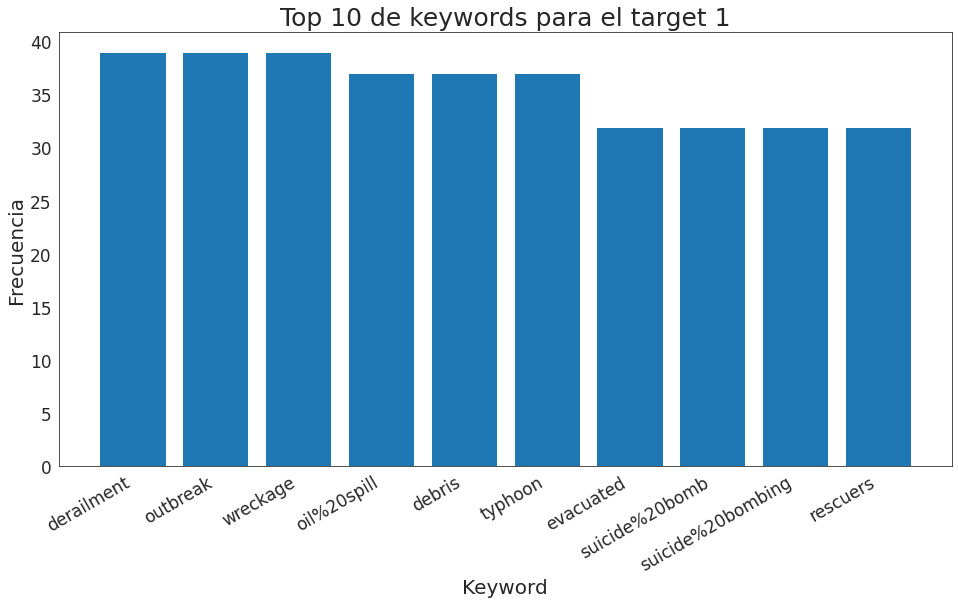

In [13]:
plt.figure(figsize=(16, 8))
plt.bar(k1.iloc[0:10].index, k1.iloc[0:10])
plt.title("Top 10 de keywords para el target 1", fontsize=25)
plt.xlabel("Keyword", fontsize=20)
plt.ylabel("Frecuencia", fontsize=20)
plt.xticks(fontsize=17, rotation=30, ha='right')
plt.yticks(fontsize=17)
plt.show()

In [14]:
k0 = df[df["target"]==0]["keyword"].value_counts() #Cantidad de apariciones de cada keyword en el target 0
k0

body%20bags          40
armageddon           37
harm                 37
wrecked              36
ruin                 36
                     ..
oil%20spill           1
suicide%20bomber      1
typhoon               1
outbreak              1
suicide%20bombing     1
Name: keyword, Length: 218, dtype: int64

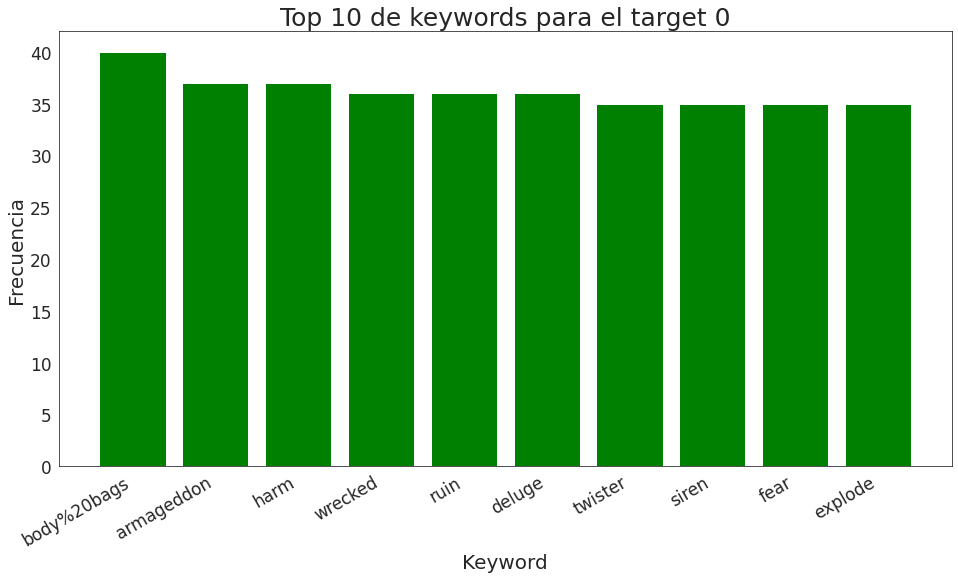

In [15]:
plt.figure(figsize=(16, 8))
plt.bar(k0.iloc[0:10].index, k0.iloc[0:10], color="green")
plt.title("Top 10 de keywords para el target 0", fontsize=25)
plt.xlabel("Keyword", fontsize=20)
plt.ylabel("Frecuencia", fontsize=20)
plt.xticks(fontsize=17, rotation=30, ha='right')
plt.yticks(fontsize=17)
plt.show()

In [16]:
k1_unique = pd.Series(dtype='uint8') #Indicar dtype evita warning
for k in k1.index:
    if k not in k0:
        k1_unique = k1_unique.append(pd.Series(index=(k,), data=k1[k]))

In [17]:
#Keywords que solo aparecen en el target 1
k1_unique

derailment    39
wreckage      39
debris        37
dtype: int64

In [18]:
k0_unique = pd.Series(dtype='uint8') #Indicar dtype evita warning
for k in k0.index:
    if k not in k1:
        k0_unique = k0_unique.append(pd.Series(index=(k,), data=k0[k]))

In [19]:
#Keywords que solo aparecen en el target 0
k0_unique

aftershock    34
dtype: int64

In [20]:
df_keywords_en_ambas = pd.DataFrame(columns=["keyword", "target_1", "target_0", "relacion_1_sobre_0"])

In [21]:
for x in df["keyword"].value_counts().iteritems():
    if x[0] in k1_unique.index or x[0] in k0_unique.index:
        continue
    df_keywords_en_ambas = df_keywords_en_ambas.append({"keyword":x[0], \
                                                        "target_1":k1[x[0]], \
                                                        "target_0":k0[x[0]]}, \
                                                       ignore_index=True)

In [22]:
df_keywords_en_ambas["relacion_1_sobre_0"] = (df_keywords_en_ambas["target_1"]/df_keywords_en_ambas["target_0"])

In [23]:
#Keywords que están en ambos targets junto con su cantidad en cada uno y la relación del 1 sobre 0
df_keywords_en_ambas

,keyword,target_1,target_0,relacion_1_sobre_0
0,fatalities,26,19,1.36842
1,armageddon,5,37,0.135135
2,deluge,6,36,0.166667
3,harm,4,37,0.108108
4,sinking,8,33,0.242424
...,...,...,...,...
212,forest%20fire,15,4,3.75
213,epicentre,1,11,0.0909091
214,threat,2,9,0.222222
215,inundation,2,8,0.25


In [24]:
df_keywords_casi_unicas = df_keywords_en_ambas.groupby("keyword")\
.filter(lambda x: x["relacion_1_sobre_0"].max()<0.1 or \
                  x["relacion_1_sobre_0"].max()>10)

#Keywords con una relación mayor o igual de 10 a 1 respecto de un target con otro
df_keywords_casi_unicas

,keyword,target_1,target_0,relacion_1_sobre_0
5,body%20bags,1,40,0.025
13,outbreak,39,1,39
19,wrecked,3,36,0.0833333
28,explode,3,35,0.0857143
33,oil%20spill,37,1,37
39,typhoon,37,1,37
54,ruin,1,36,0.0277778
59,panic,3,34,0.0882353
60,screaming,2,34,0.0588235
95,traumatised,2,33,0.0606061


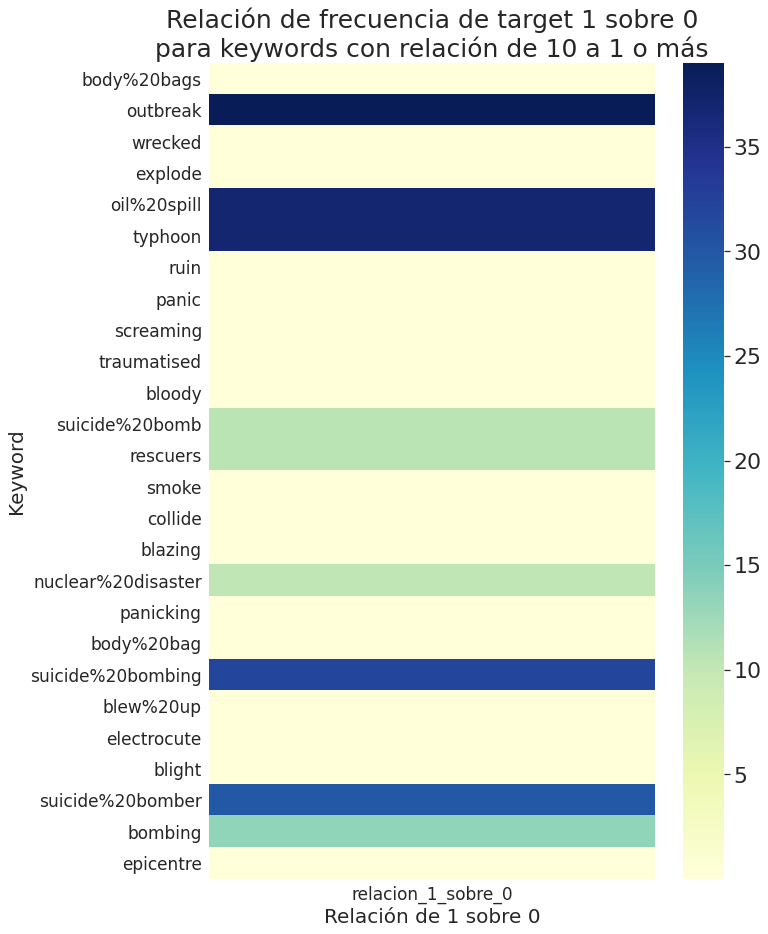

In [25]:
df_heat = df_keywords_casi_unicas.drop(["target_1", "target_0"], axis=1)
df_heat["relacion_1_sobre_0"] = df_heat["relacion_1_sobre_0"].map(lambda x:float(x))
df_heat = df_heat.set_index("keyword")
plt.figure(figsize=(10,15))
plt.title("Relación de frecuencia de target 1 sobre 0\npara keywords con relación de 10 a 1 o más", \
         fontsize=25)
sns.set(font_scale=2) # Para el tamaño de fuente de cmap
sns.heatmap(df_heat[["relacion_1_sobre_0"]], cmap="YlGnBu")
plt.ylabel("Keyword", fontsize=20)
plt.xlabel("Relación de 1 sobre 0", fontsize=20)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
plt.show()

In [26]:
# Para limpiar el estilo
sns.set(font_scale=2)
sns.set_style('white')

Como se pudo ver, hay algunas keywords que son únicas para cada target, y su cantidad es suficientemente alta como para decir que si aparece otra vez, ya sabemos a que target pertenecerá. Por otro lado hay otras que aparecen en ambos pero la cantidad es mucho mayor en uno que en otro, por lo que tenemos una alta probabilidad de adivinar si aparece nuevamente.

## Location vs. Target

En este análisis se intentará encontrar la relación entre las location y los target.

In [27]:
#Cantidad de filas del dataframe con location
df["location"].count()

5080

In [28]:
#Porcentaje de filas con location respecto al total
round(df["location"].count()/len(df)*100, 2)

66.73

In [29]:
#Cantidad de valores diferentes de location junto con su frecuencia
df["location"].value_counts()

USA                     104
New York                 71
United States            50
London                   45
Canada                   29
                       ... 
Washington, DC 20009      1
Pontevedra, Galicia       1
Beit El - Israel          1
Around the world          1
Anaheim                   1
Name: location, Length: 3341, dtype: int64

In [30]:
#Los 20 valores más frecuentes de location
df["location"].value_counts().nlargest(20)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
California          17
New York, NY        15
California, USA     15
Everywhere          15
Florida             14
Name: location, dtype: int64

In [31]:
#Cantidad de apariciones de cada location en el target 1
k1 = df[df["target"]==1]["location"].value_counts()
k1

USA                            67
United States                  27
Nigeria                        22
India                          20
Mumbai                         19
                               ..
london                          1
GO BLUE! HAIL YES!!             1
Ile-Ife,Osun state, Nigeria     1
ÌÏT: 6.4682,3.18287             1
Anaheim                         1
Name: location, Length: 1513, dtype: int64

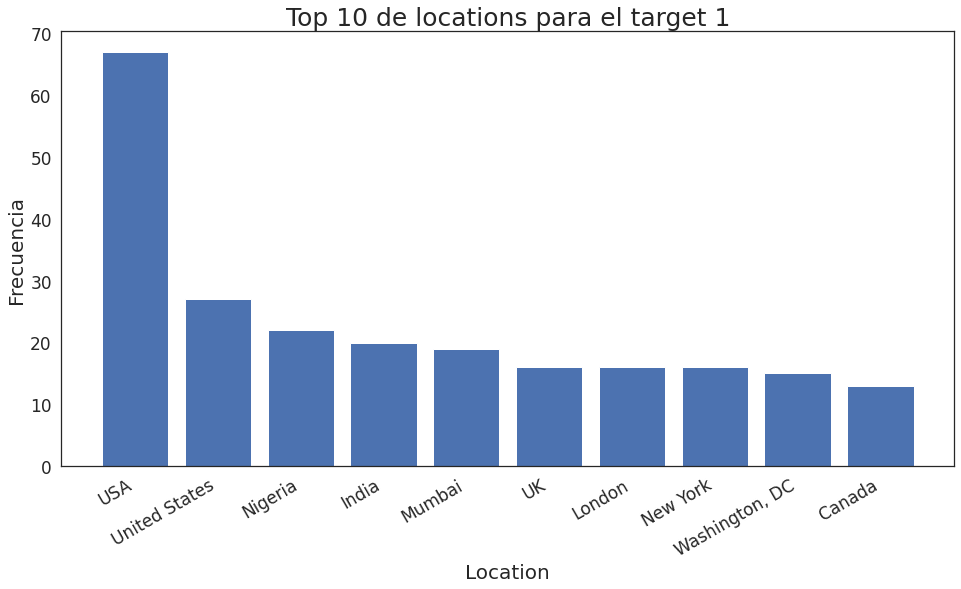

In [32]:
plt.figure(figsize=(16, 8))
sns.set_style('white') # Para lavar el estilo de seaborn
plt.bar(k1.iloc[0:10].index, k1.iloc[0:10])
plt.title("Top 10 de locations para el target 1", fontsize=25)
plt.xlabel("Location", fontsize=20)
plt.ylabel("Frecuencia", fontsize=20)
plt.xticks(fontsize=17, rotation=30, ha='right')
plt.yticks(fontsize=17)
plt.show()

In [33]:
#Cantidad de apariciones de cada location en el target 0
k0 = df[df["target"]==0]["location"].value_counts()
k0

New York                          55
USA                               37
London                            29
United States                     23
Los Angeles, CA                   18
                                  ..
North West London                  1
London / Birmingham                1
St.Cloud, MN                       1
Someday I'll live in England.      1
|-/                                1
Name: location, Length: 2142, dtype: int64

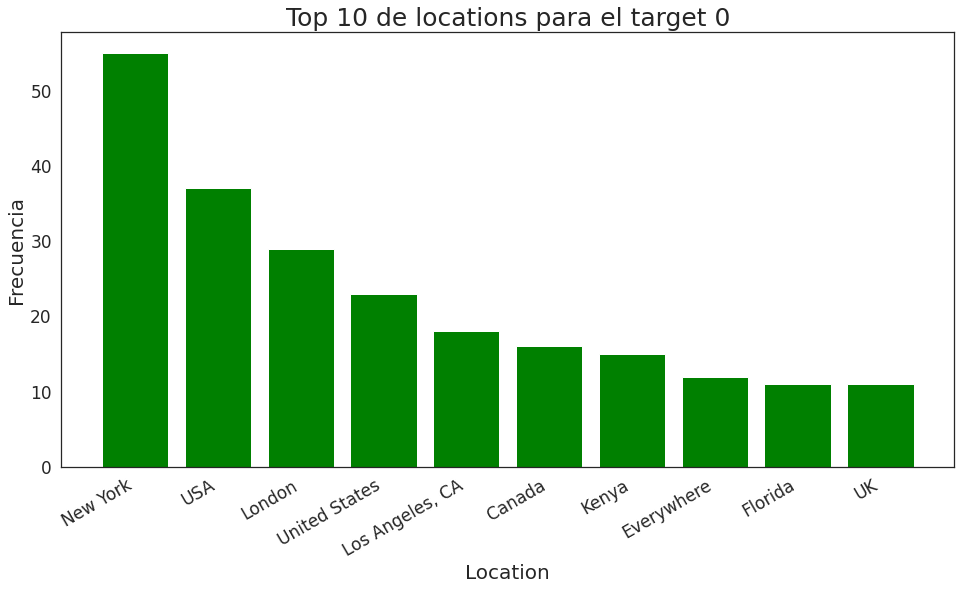

In [34]:
plt.figure(figsize=(16, 8))
plt.bar(k0.iloc[0:10].index, k0.iloc[0:10], color="green")
plt.title("Top 10 de locations para el target 0", fontsize=25)
plt.xlabel("Location", fontsize=20)
plt.ylabel("Frecuencia", fontsize=20)
plt.xticks(fontsize=17, rotation=30, ha='right')
plt.yticks(fontsize=17)
plt.show()

In [35]:
k1_unique = pd.Series(dtype='uint8') #Indicar dtype evita warning
for k in k1.index:
    if k not in k0:
        k1_unique = k1_unique.append(pd.Series(index=(k,), data=k1[k]))

In [36]:
#Locations que solo aparecen en el target 1
k1_unique

Nairobi-KENYA                  4
Midwest                        4
Portland, Oregon               4
Sacramento                     4
Bend, Oregon                   4
                              ..
Traverse City, MI              1
GO BLUE! HAIL YES!!            1
Ile-Ife,Osun state, Nigeria    1
ÌÏT: 6.4682,3.18287            1
Anaheim                        1
Length: 1199, dtype: int64

In [37]:
k0_unique = pd.Series(dtype='uint8') #Indicar dtype evita warning
for k in k0.index:
    if k not in k1:
        k0_unique = k0_unique.append(pd.Series(index=(k,), data=k0[k]))

In [38]:
#Locations que solo aparecen en el target 0
k0_unique

304                               9
Pennsylvania, USA                 7
Morioh, Japan                     6
Indiana                           5
Wisconsin                         5
                                 ..
North West London                 1
London / Birmingham               1
St.Cloud, MN                      1
Someday I'll live in England.     1
|-/                               1
Length: 1828, dtype: int64

Al ver estos datos, nos damos cuenta que el valor que aparece en location no tiene un criterio bien especificado, ya que por ejemplo tenemos valores de Nueva York como clave en minúscula y también en mayúscula y en otros aparece como ciudad, lo que no sirve para identificar si los anteriores se refieren al estado o a la ciudad y por otro lado hay claves con el valor del país, el cual incluye a muchos lugares como el mencionado, y muchos otros valores que solo aparecen una vez y no se pueden identificar como "Loading..." u otros como "Worldwide" no sirven para hacer un análisis sobre este campo y por lo tanto se limita mucho las cosas para lo que se puede usar.

## Palabras frecuentes

A continuación se verán cuáles son las palabras más repetidas para cada target y si podemos obtener conclusiones de ello.

In [39]:
df["text"] = df["text"].transform(lambda x: x.lower().split())

In [40]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[our, deeds, are, the, reason, of, this, #eart...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask., canada]",1
2,5,NaN,NaN,"[all, residents, asked, to, 'shelter, in, plac...",1
3,6,NaN,NaN,"[13,000, people, receive, #wildfires, evacuati...",1
4,7,NaN,NaN,"[just, got, sent, this, photo, from, ruby, #al...",1


In [41]:
s = pd.Series(dtype=str) #Indicar dtype evita warning
for x in df["text"]:
    s = s.append(pd.Series(x))

In [42]:
s[0:10]

0            our
1          deeds
2            are
3            the
4         reason
5             of
6           this
7    #earthquake
8            may
9          allah
dtype: object

In [43]:
s.to_frame().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113461 entries, 0 to 12
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       113461 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [44]:
from collections import Counter

In [45]:
#50 palabras más comunes
Counter(s).most_common(50)

[('the', 3207),
 ('a', 2135),
 ('in', 1949),
 ('to', 1934),
 ('of', 1814),
 ('and', 1405),
 ('i', 1336),
 ('is', 930),
 ('for', 880),
 ('on', 834),
 ('-', 763),
 ('you', 746),
 ('my', 671),
 ('with', 562),
 ('that', 538),
 ('at', 532),
 ('by', 514),
 ('it', 504),
 ('this', 463),
 ('from', 420),
 ('are', 397),
 ('be', 396),
 ('was', 381),
 ('have', 380),
 ('like', 341),
 ('as', 327),
 ('just', 313),
 ('but', 311),
 ('so', 310),
 ('&amp;', 295),
 ('up', 292),
 ('not', 288),
 ('your', 287),
 ('me', 275),
 ('after', 256),
 ('will', 254),
 ('has', 247),
 ('an', 243),
 ('all', 241),
 ('no', 239),
 ('out', 239),
 ("i'm", 237),
 ('when', 237),
 ('if', 234),
 ('get', 227),
 ('we', 223),
 ('new', 215),
 ('??', 214),
 ('via', 214),
 ('about', 213)]

In [46]:
s1 = pd.Series(dtype=str) #Indicar dtype evita warning
for x in df[df["target"]==1]["text"]:
    s1 = s1.append(pd.Series(x))

In [47]:
s1[0:10]

0            our
1          deeds
2            are
3            the
4         reason
5             of
6           this
7    #earthquake
8            may
9          allah
dtype: object

In [48]:
#50 palabras más comunes del target 1
Counter(s1).most_common(50)

[('the', 1330),
 ('in', 1144),
 ('of', 919),
 ('a', 897),
 ('to', 753),
 ('and', 494),
 ('on', 410),
 ('for', 394),
 ('-', 389),
 ('is', 344),
 ('at', 303),
 ('i', 284),
 ('by', 274),
 ('from', 243),
 ('with', 188),
 ('that', 181),
 ('after', 181),
 ('this', 177),
 ('as', 167),
 ('are', 166),
 ('was', 165),
 ('it', 163),
 ('fire', 151),
 ('have', 140),
 ('my', 130),
 ('over', 123),
 ('you', 121),
 ('more', 121),
 ('via', 117),
 ('up', 114),
 ('an', 113),
 ('be', 112),
 ('...', 106),
 ('&amp;', 105),
 ('has', 104),
 ('suicide', 103),
 ('who', 100),
 ('no', 99),
 ('disaster', 97),
 ('but', 95),
 ('police', 94),
 ('people', 93),
 ('been', 93),
 ('when', 93),
 ('killed', 92),
 ('like', 91),
 ('not', 90),
 ('california', 88),
 ('than', 85),
 ('just', 84)]

In [49]:
s0 = pd.Series(dtype=str) #Indicar dtype evita warning
for x in df[df["target"]==0]["text"]:
    s0 = s0.append(pd.Series(x))

In [50]:
s0[0:10]

0    what's
1        up
2      man?
0         i
1      love
2    fruits
0    summer
1        is
2    lovely
0        my
dtype: object

In [51]:
#50 palabras más comunes del target 0
Counter(s0).most_common(50)

[('the', 1877),
 ('a', 1238),
 ('to', 1181),
 ('i', 1052),
 ('and', 911),
 ('of', 895),
 ('in', 805),
 ('you', 625),
 ('is', 586),
 ('my', 541),
 ('for', 486),
 ('on', 424),
 ('with', 374),
 ('-', 374),
 ('that', 357),
 ('it', 341),
 ('this', 286),
 ('be', 284),
 ('like', 250),
 ('have', 240),
 ('by', 240),
 ('so', 235),
 ('are', 231),
 ('at', 229),
 ('just', 229),
 ('your', 225),
 ('me', 221),
 ('was', 216),
 ('but', 216),
 ('not', 198),
 ("i'm", 195),
 ('&amp;', 190),
 ('??', 183),
 ('out', 179),
 ('up', 178),
 ('will', 177),
 ('if', 177),
 ('from', 177),
 ('all', 173),
 ('new', 163),
 ('get', 161),
 ('as', 160),
 ('or', 155),
 ('we', 148),
 ('when', 144),
 ('has', 143),
 ('he', 143),
 ('no', 140),
 ('about', 139),
 ('they', 133)]

Como vemos, las palabras más repetidas son las "stopwords", lo cual es lógico, pero también aparecen otras expresiones que pueden destacarse en el target 1 como "fire", "suicide", "disaster", "police" y estas aparecen muchas veces y están entre las 50 más comunes de este target, pero no así para las 50 primeras del target 0, que se parece más al combinado total. 

## Hashtags y Menciones

A continuación veremos la cantidad de hastags y menciones que hay en los datos y si guardan alguna relación con los targets.

In [52]:
df = pd.read_csv('train.csv')

In [53]:
df["text"] = df["text"].map(lambda x:x.split()) 
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[Our, Deeds, are, the, Reason, of, this, #eart...",1
1,4,NaN,NaN,"[Forest, fire, near, La, Ronge, Sask., Canada]",1
2,5,NaN,NaN,"[All, residents, asked, to, 'shelter, in, plac...",1
3,6,NaN,NaN,"[13,000, people, receive, #wildfires, evacuati...",1
4,7,NaN,NaN,"[Just, got, sent, this, photo, from, Ruby, #Al...",1


### Hashtags 

In [54]:
def contar_hashtags(x):
    contador = 0
    for i in x:
        if i[0] == '#' and len(i) > 0:
            contador += 1
    return contador

df["nro_hashtags_en_tweet"] = df["text"].map(contar_hashtags)

In [55]:
#Número total de tweets con hashtags
df["nro_hashtags_en_tweet"].map(lambda x: 1 if x>0 else 0).sum()

1734

In [56]:
#Número total de hashtags
df["nro_hashtags_en_tweet"].sum()

3340

In [57]:
#Cantidad de tweets con más de un hashtag
df["nro_hashtags_en_tweet"].map(lambda x: True if x>1 else False).sum()

781

In [58]:
#Frecuencias de las distintas cantidades de hashtags por tweet
df["nro_hashtags_en_tweet"].value_counts()

0     5879
1      953
2      398
3      203
4       83
5       38
6       26
10      10
7        8
8        7
13       4
11       2
9        2
Name: nro_hashtags_en_tweet, dtype: int64

In [59]:
#Frecuencias de nro. de hashtags en tweet por target
df.groupby(["nro_hashtags_en_tweet", "target"]).agg("count")["id"]

nro_hashtags_en_tweet  target
0                      0         3465
                       1         2414
1                      0          478
                       1          475
2                      0          201
                       1          197
3                      0          108
                       1           95
4                      0           43
                       1           40
5                      0           17
                       1           21
6                      0           18
                       1            8
7                      0            4
                       1            4
8                      0            1
                       1            6
9                      0            2
10                     0            3
                       1            7
11                     0            2
13                     1            4
Name: id, dtype: int64

In [60]:
hashtags = pd.Series(dtype=str) #Indicar dtype evita warning
for x in df["text"]:
    for i in x:
        if i[0] == '#':
            hashtags = hashtags.append(pd.Series(i))

In [61]:
hashtags

0    #earthquake
0     #wildfires
0        #Alaska
0     #wildfires
0     #RockyFire
        ...     
0        #iPhone
0      #breaking
0            #LA
0     #WorldNews
0    #stormchase
Length: 3340, dtype: object

In [62]:
top_10_hashtags = Counter(hashtags).most_common(10)
#Top 10 hashtags con frecuencias
top_10_hashtags

[('#news', 36),
 ('#News', 36),
 ('#hot', 30),
 ('#prebreak', 30),
 ('#best', 30),
 ('#???', 23),
 ('#??', 20),
 ('#Hiroshima', 20),
 ('#GBBO', 16),
 ('#terrorism', 11)]

In [63]:
cant_top_10_hashtags_por_target = []
for x in top_10_hashtags:
    cant_top_10_hashtags_por_target.append([x[0], 0, 0])

In [64]:
index = 0
for x in df["text"]:
    for i in x:
        if i in [j[0] for j in top_10_hashtags]:
            if df.loc[index]["target"] == 0:
                cant_top_10_hashtags_por_target[[j[0] for j in top_10_hashtags].index(i)][1] += 1
            else:
                cant_top_10_hashtags_por_target[[j[0] for j in top_10_hashtags].index(i)][2] += 1
    index += 1

In [65]:
#Top 10 hashtags con frecuencias por target (0, 1)
cant_top_10_hashtags_por_target

[['#news', 15, 21],
 ['#News', 5, 31],
 ['#hot', 17, 13],
 ['#prebreak', 17, 13],
 ['#best', 17, 13],
 ['#???', 0, 23],
 ['#??', 1, 19],
 ['#Hiroshima', 0, 20],
 ['#GBBO', 12, 4],
 ['#terrorism', 3, 8]]

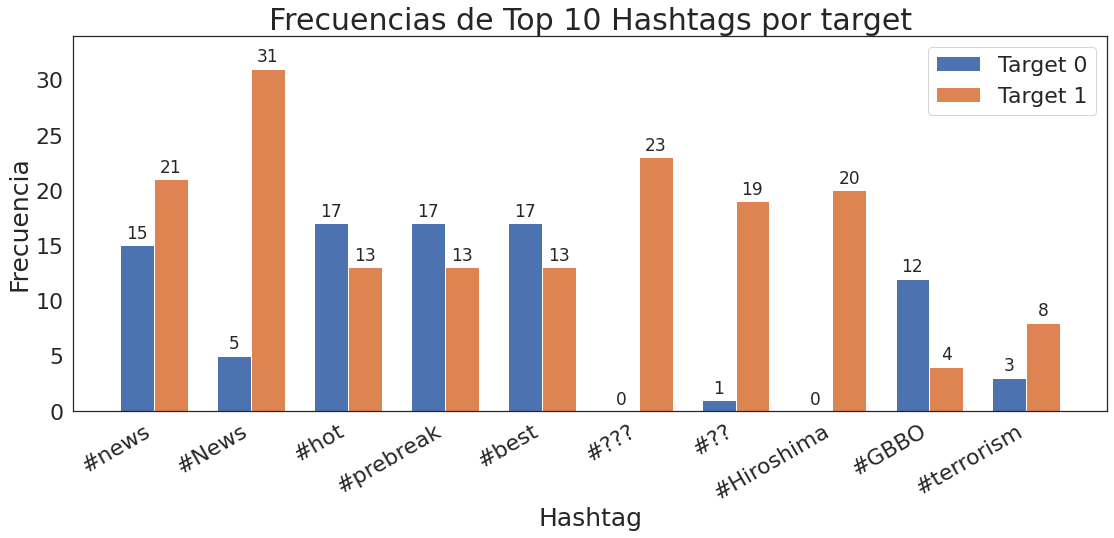

In [66]:
ancho = 0.35
x = pd.array(range(len(cant_top_10_hashtags_por_target)))
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)#fig.set_size_inches(10, 8)
rects1 = ax.bar(x - ancho/2, [i[1] for i in cant_top_10_hashtags_por_target], ancho, label='Target 0')
rects2 = ax.bar(x + ancho/2, [i[2] for i in cant_top_10_hashtags_por_target], ancho, label='Target 1')

ax.set_ylabel('Frecuencia', fontsize=25)
ax.set_xlabel('Hashtag', fontsize=25)
ax.set_title('Frecuencias de Top 10 Hashtags por target', fontsize=30)
ax.set_xticks(x)
ax.set_xticklabels([i[0] for i in cant_top_10_hashtags_por_target])
ax.set_ylim([0,34]) # Para que no se superponga el 31 de la barra más larga
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=17)


autolabel(rects1)
autolabel(rects2)

plt.xticks(fontsize=22, rotation=30, ha='right')
plt.yticks(fontsize=22)

fig.tight_layout()

plt.show()

Viendo los resultados de los hashtags, nos damos cuenta de que la mayoría no contiene ninguno, y de los demás que si contienen, vemos que algunos tweets son puros hashtags (hasta 13 hashtags en 1 tweet). Luego, dentro de los hashtags más frecuentes vemos que algunos están completamente desbalanceados según el target, como "News" o "???" lo que puede servir a futuro para realizar predicciones.

### Menciones 

In [67]:
def contar_menciones(x):
    contador = 0
    for i in x:
        if i[0] == '@' and len(i) > 0:
            contador += 1
    return contador

df["nro_menciones_en_tweet"] = df["text"].map(contar_menciones)

In [68]:
#Número total de tweets con menciones
df["nro_menciones_en_tweet"].map(lambda x: 1 if x>0 else 0).sum()

1985

In [69]:
#Número total de menciones
df["nro_menciones_en_tweet"].sum()

2664

In [70]:
#Cantidad de tweets con más de una mención
df["nro_menciones_en_tweet"].map(lambda x: True if x>1 else False).sum()

468

In [71]:
#Frecuencias de las distintas cantidades de menciones por tweet
df["nro_menciones_en_tweet"].value_counts()

0    5628
1    1517
2     341
3      76
4      28
5      16
6       5
7       1
8       1
Name: nro_menciones_en_tweet, dtype: int64

In [72]:
#Frecuencias de nro. de menciones en tweet por target
df.groupby(["nro_menciones_en_tweet", "target"]).agg("count")["id"]

nro_menciones_en_tweet  target
0                       0         3011
                        1         2617
1                       0         1016
                        1          501
2                       0          235
                        1          106
3                       0           41
                        1           35
4                       0           19
                        1            9
5                       0           13
                        1            3
6                       0            5
7                       0            1
8                       0            1
Name: id, dtype: int64

In [73]:
menciones = pd.Series(dtype=str) #Indicar dtype evita warning
for x in df["text"]:
    for i in x:
        if i[0] == '@':
            menciones = menciones.append(pd.Series(i))

In [74]:
menciones

0            @bbcmtd
0        @PhDSquares
0    @southridgelife
0               @Û_
0          @Navista7
          ...       
0     @cameronhacker
0        @engineshed
0     @LivingSafely:
0       @aria_ahrary
0       @TheTawniest
Length: 2664, dtype: object

In [75]:
top_10_menciones = Counter(menciones).most_common(10)
#Top 10 menciones con frecuencias
top_10_menciones

[('@YouTube', 82),
 ('@', 27),
 ('@ArianaGrande', 11),
 ('@POTUS', 9),
 ('@Change', 9),
 ('@FoxNews', 9),
 ('@emmerdale', 8),
 ('@djicemoon', 7),
 ('@justinbieber', 7),
 ('@MikeParrActor', 6)]

In [76]:
cant_top_10_menciones_por_target = []
for x in top_10_menciones:
    cant_top_10_menciones_por_target.append([x[0], 0, 0])

In [77]:
index = 0
for x in df["text"]:
    for i in x:
        if i in [j[0] for j in top_10_menciones]:
            if df.loc[index]["target"] == 0:
                cant_top_10_menciones_por_target[[j[0] for j in top_10_menciones].index(i)][1] += 1
            else:
                cant_top_10_menciones_por_target[[j[0] for j in top_10_menciones].index(i)][2] += 1
    index += 1

In [78]:
#Top 10 menciones con frecuencias por target (0, 1)
cant_top_10_menciones_por_target

[['@YouTube', 65, 17],
 ['@', 18, 9],
 ['@ArianaGrande', 11, 0],
 ['@POTUS', 3, 6],
 ['@Change', 5, 4],
 ['@FoxNews', 1, 8],
 ['@emmerdale', 7, 1],
 ['@djicemoon', 7, 0],
 ['@justinbieber', 7, 0],
 ['@MikeParrActor', 6, 0]]

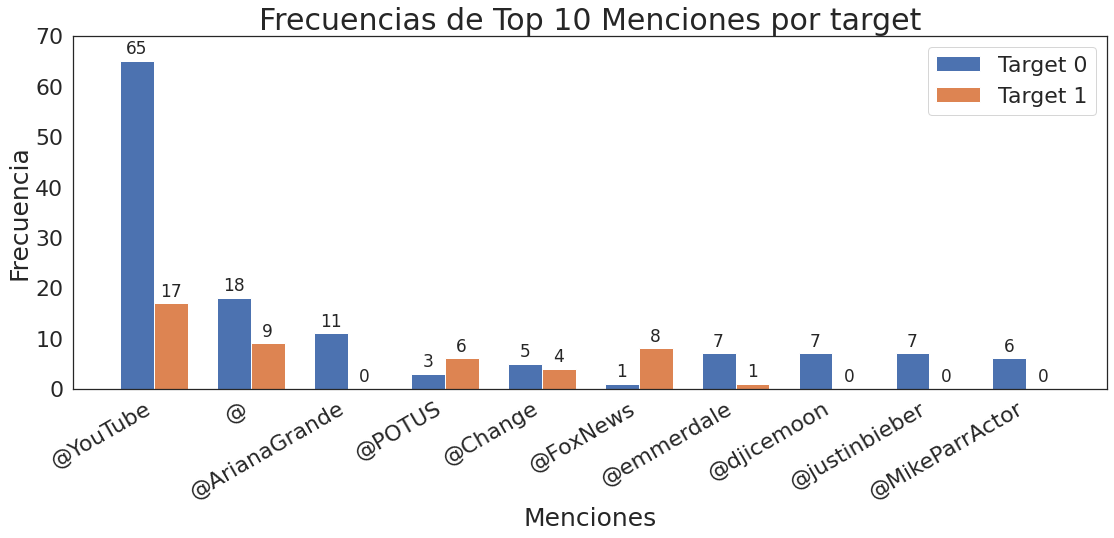

In [79]:
ancho = 0.35
x = pd.array(range(len(cant_top_10_menciones_por_target)))
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
rects1 = ax.bar(x - ancho/2, [i[1] for i in cant_top_10_menciones_por_target], ancho, label='Target 0')
rects2 = ax.bar(x + ancho/2, [i[2] for i in cant_top_10_menciones_por_target], ancho, label='Target 1')

ax.set_ylabel('Frecuencia', fontsize=25)
ax.set_xlabel('Menciones', fontsize=25)
ax.set_title('Frecuencias de Top 10 Menciones por target', fontsize=30)
ax.set_xticks(x)
ax.set_xticklabels([i[0] for i in cant_top_10_menciones_por_target])
ax.set_ylim([0,70]) # Para que no se superponga el 31 de la barra más larga
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=17)

autolabel(rects1)
autolabel(rects2)

plt.xticks(fontsize=22, rotation=30, ha='right')
plt.yticks(fontsize=22)

fig.tight_layout()

plt.show()

En las menciones vemos que la cantidad de tweets que las contienen es un poquito mayor que en los hashtags y vemos una distribución más pareja en cantidad de menciones por tweet. En cuento a las menciones más repetidas vemos que los números totales son mucho más bajos y por lo tanto las frecuencias no son tan grandes como para sacar conclusiones relevantes.

## Análisis con limpieza de texto

### Información general del set de datos

In [80]:
df = pd.read_csv('train.csv')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [82]:
print('Proporción de relleno de campo "keyword":', \
      round(df['keyword'].dropna().count() / df.shape[0], 2))
print('Proporción de relleno de campo "location":', \
      round(df['location'].dropna().count() / df.shape[0], 2))

Proporción de relleno de campo "keyword": 0.99
Proporción de relleno de campo "location": 0.67


#### Muestra aleatoria del set de datos

In [83]:
df.sample(5)

,id,keyword,location,text,target
711,1026,blazing,"Pennsylvania, PA",I still don't know how 8 hours of physical act...,0
734,1062,bleeding,NaN,Deadpool is already one of my favourite marvel...,0
2094,3010,death,"Novi, MI",Adult dies of plague in Colorado http://t.co/y...,1
5521,7876,quarantined,NaN,I'm just going to say it. Under the new reddit...,0
7039,10085,typhoon,NaN,Price of vegetables rises on Typhoon Soudelor ...,1


#### Descripción de variables estadísticas del set de datos

In [84]:
df.describe(include=[np.object, np.number]).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,7613,NaN,NaN,NaN,5441.93,3137.12,1,2734,5408,8146,10873
keyword,7552,221,fatalities,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,5080,3341,USA,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,7613,7503,11-Year-Old Boy Charged With Manslaughter of T...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,7613,NaN,NaN,NaN,0.42966,0.49506,0,0,0,1,1


In [85]:
# Se elige un ancho para la visualización de columnas
pd.set_option('max_colwidth', 150)

display(df.loc[df['text'].str.contains('11-Year-Old Boy')])

# Se vuelve al valor por default de 'max_colwidth'
pd.reset_option('max_colwidth')

,id,keyword,location,text,target
3578,5113,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1
3589,5127,fatal,Varanasi,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1
3591,5130,fatal,Thane,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1
3597,5137,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1
3600,5140,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1
3603,5144,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1
3604,5145,fatal,Bangalore,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1
3610,5153,fatal,Dimapur,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1
3613,5157,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1
3614,5159,fatal,NaN,11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1


Hay mensajes que se repiten. Puede tratarse de retweets.

#### Lugares

In [86]:
df['location'].nunique()

3341

In [87]:
df['location'].value_counts()[0:10]

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: int64

In [88]:
# Se elige un ancho para la visualización de columnas
pd.set_option('max_colwidth', 150)

display(df.loc[df['location'] == 'Indonesia'])

# Se vuelve al valor por default de 'max_colwidth'
pd.reset_option('max_colwidth')

,id,keyword,location,text,target
148,212,airplane%20accident,Indonesia,#KCA #VoteJKT48ID mbataweel: #RIP #BINLADEN Family members who killed in an airplane's accident,1
882,1277,blood,Indonesia,it wasnt a very big stab but it was a deep stab and theres like blood everwhe,1
1998,2872,damage,Indonesia,'Mages of Fairy Tail.. Specialize in property damage!' - Natsu Dragneel,0
3732,5304,fear,Indonesia,The fear of the Lord is the start of knowledge: but the foolish have no use for wisdom and teaching (Amsal 1:7),0
4737,6736,lava,Indonesia,@YoungHeroesID 4. Lava Blast Power Red #PantherAttack,0
5285,7552,outbreak,Indonesia,More than 40 families affected by the fatal outbreak of Legionnaires' disease in Edinburgh are to sue two comp... http://t.co/vsoXioOy78,1
5433,7752,police,Indonesia,Police kill hatchet-wielding gunman who opened fire inside Nashville movie theater: AåÊmiddle-aged manåÊarmed wi... http://t.co/tyD47NfL5x,1
5451,7773,police,Indonesia,Oops: Bounty hunters try to raid Phoenix police chief's home http://t.co/u30n3fFX8Y,0
5462,7790,police,Indonesia,Oops: Bounty hunters try to raid Phoenix police chief's home: A group of armed bounty hunters surrounded the h... http://t.co/dGELJ8rYt9,1
6227,8888,smoke,Indonesia,@TeamAtoWinner no.. i mean when is mino said that he doesn't smoke? u mention it before.. :)),0


Hay 3341 lugares únicos en 5080 casos por lo que vemos que hay muchos lugares de donde pueden provenir los mensajes. Haciendo un análisis básico, para nada automatizado, en Nigeria, Mumbai, Kenia, Indonesia e India, la mayoría de los mensajes están escritos en inglés. Entonces se puede suponer que la casi totalidad de los mensajes está en inglés.

#### Conversión de tipos de datos

- `id` toma valores del rango `[1, 10873]`, entonces puede usarse el tipo `uint16`.
- `target` puede ser `0` ó `1`.

In [89]:
df['id'] = df['id'].astype(np.uint16)
df['target'] = df['target'].astype(np.uint8)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   uint16
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   uint8 
dtypes: object(3), uint16(1), uint8(1)
memory usage: 200.9+ KB


#### Búsqueda de duplicados

In [90]:
df.duplicated(subset=['id']).sum()

0

Se deduce que todos los tweets son únicos (no hay ducplicados) y que no hay atributos de `text` nulos. Además todas las filas tienen un `target`.

Ahora hay que analizar las palabras.

## Limpieza de datos

Se va a crear un nuevo DataFrame para almacenar los mensajes procesados.

In [91]:
#======= MUESTRA ALEATORIA =======
# Se elige un ancho para la visualización de columnas
pd.set_option('max_colwidth', 150)

display(df.sample(10, random_state=42))

# Se vuelve al valor por default de 'max_colwidth'
pd.reset_option('max_colwidth')

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-imaginable destruction.,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just got soaked in a deluge going for pads and tampons. Thx @mishacollins @/@,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. I want to thank everyone for making it possible. What a great night.,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts develop a defensive self - one that decreases vulnerability. (3,0
5559,7934,rainstorm,NaN,@Calum5SOS you look like you got caught in a rainstorm this is amazing and disgusting at the same time,0
1765,2538,collision,NaN,my favorite lady came to our volunteer meeting\nhopefully joining her youth collision and i am excite http://t.co/Ij0wQ490cS,1
1817,2611,crashed,NaN,@brianroemmele UX fail of EMV - people want to insert and remove quickly like a gas pump stripe reader. 1 person told me it crashed the POS,1
6810,9756,tragedy,"Los Angeles, CA",Can't find my ariana grande shirt this is a fucking tragedy,0
4398,6254,hijacking,"Athens,Greece",The Murderous Story Of AmericaÛªs First Hijacking http://t.co/EYUGk6byxr,1


In [92]:
import re # Paquete regular expressions.
import string
df_cleaned = df.copy() # Copia del set de datos.

In [93]:
# Función para limpiar el texto de los mensajes.
def clean_text(text):
    # Se convierte el texto a minúsculas.
    text = text.lower()
    # Se quitan los '#'.
    text = re.sub('#', '', text)
    # Se quitan los números.
    text = re.sub('\w*\d\w*', '', text)
    # Se quitan los saltos de línea.
    text = re.sub('\n', ' ', text)
    # Se eliminan las referencias a usuarios '@user'.
    text = re.sub('@\S*', '', text)
    # Se quitan vínculos URL.
    text = re.sub('https{0,1}:\/\/\S*', ' ', text)
    # Se simplifican múltiples espacios a uno solo.
    text = re.sub('(\ ){2,7}', ' ',text)
    # Se quitan los signos de puntuación.
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text

df_cleaned['text'] = df_cleaned['text'].apply(lambda x: clean_text(x))

#======= MUESTRA ALEATORIA =======
# Se elige un ancho para la visualización de columnas
pd.set_option('max_colwidth', 150)

display(df_cleaned.sample(10, random_state=42))

# Se vuelve al valor por default de 'max_colwidth'
pd.reset_option('max_colwidth')

,id,keyword,location,text,target
2644,3796,destruction,NaN,so you have a new weapon that can cause unimaginable destruction,1
2227,3185,deluge,NaN,the famp things i do for gishwhes just got soaked in a deluge going for pads and tampons thx,0
5448,7769,police,UK,dt rt ûïthe col police can catch a pickpocket in liverpool stree,1
132,191,aftershock,NaN,aftershock back to school kick off was great i want to thank everyone for making it possible what a great night,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma children of addicts develop a defensive self one that decreases vulnerability,0
5559,7934,rainstorm,NaN,you look like you got caught in a rainstorm this is amazing and disgusting at the same time,0
1765,2538,collision,NaN,my favorite lady came to our volunteer meeting hopefully joining her youth collision and i am excite,1
1817,2611,crashed,NaN,ux fail of emv people want to insert and remove quickly like a gas pump stripe reader person told me it crashed the pos,1
6810,9756,tragedy,"Los Angeles, CA",cant find my ariana grande shirt this is a fucking tragedy,0
4398,6254,hijacking,"Athens,Greece",the murderous story of americaûªs first hijacking,1


## Generación de una matriz de términos de todos los mensajes

In [94]:
# Se combinan todos los mensajes.
text_raw = ' '.join(df_cleaned['text'])
# Se simplifican múltiples espacios a uno solo.
text_raw = re.sub('(\ ){2,7}', ' ',text_raw)
text_raw[0:1000]

'our deeds are the reason of this earthquake may allah forgive us all forest fire near la ronge sask canada all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected people receive wildfires evacuation orders in california just got sent this photo from ruby alaska as smoke from wildfires pours into a school rockyfire update california hwy closed in both directions due to lake county fire cafire wildfires flood disaster heavy rain causes flash flooding of streets in manitou colorado springs areas im on top of the hill and i can see a fire in the woods theres an emergency evacuation happening now in the building across the street im afraid that the tornado is coming to our area three people died from the heat wave so far haha south tampa is getting flooded hah wait a second i live in south tampa what am i gonna do what am i gonna do fvck flooding raining flooding florida tampabay tampa or days ive lost count flood i

Ahora nos vamos a fijar si las palabras más frecuentes pueden ser consideradas stop words.

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

In [96]:
cv = CountVectorizer(stop_words='english')
# Se usa [text_raw] porque requiere un iterable.
data_cv = cv.fit_transform([text_raw])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm = data_dtm.T

data_dtm

,0
aa,2
aaaa,1
aaaaaaallll,1
aaaaaand,1
aaarrrgghhh,1
...,...
ûóher,1
ûókody,1
ûónegligence,1
ûótech,1


In [97]:
# Se renombran la columna.
data_dtm.rename(columns={0:'count'}, inplace=True)
# Se toman las primeras 9 palabras con mayor frecuencia.
top_words = data_dtm.sort_values(by='count', ascending=False).head(9)
top_words

,count
like,345
just,320
amp,303
im,300
new,226
people,195
news,192
dont,191
video,165


Tomamos las primeras 9 palabras más repetidas y la agregamos a la lista de stop words.

In [98]:
# El paquete 'text' contiene las stop words.
from sklearn.feature_extraction import text 

stop_words_to_add = top_words.index
stop_words_to_add

Index(['like', 'just', 'amp', 'im', 'new', 'people', 'news', 'dont', 'video'], dtype='object')

In [99]:
# Se agregan las nuevas stop words.
stop_words_new = text.ENGLISH_STOP_WORDS.union(stop_words_to_add)

Ahora se puede limpiar de nuevo el texto de todos los mensajes con las nuevas palabras a ignorar.

In [100]:
cv = CountVectorizer(stop_words=stop_words_new)
# Se usa [text_raw] porque requiere un iterable.
data_cv = cv.fit_transform([text_raw])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm = data_dtm.T
data_dtm

,0
aa,2
aaaa,1
aaaaaaallll,1
aaaaaand,1
aaarrrgghhh,1
...,...
ûóher,1
ûókody,1
ûónegligence,1
ûótech,1


Se ve que se redujeron 9 palabras, de 14310 términos a 14301.

In [101]:
# Se renombran las columnas.
data_dtm.rename(columns={'index':'term', 0:'count'}, inplace=True)
# Se toman las primeras 10 palabras con mayor frecuencia.
words_freq_des = data_dtm.sort_values(by='count', ascending=False)
words_freq_des.head(10)

,count
emergency,157
disaster,153
police,141
body,125
burning,120
crash,118
storm,117
california,117
suicide,116
got,112


## Generación de Word Cloud para todos las palabras

In [102]:
dictionary = words_freq_des['count'].to_dict()
dictionary

{'emergency': 157,
 'disaster': 153,
 'police': 141,
 'body': 125,
 'burning': 120,
 'crash': 118,
 'storm': 117,
 'california': 117,
 'suicide': 116,
 'got': 112,
 'know': 112,
 'day': 112,
 'time': 112,
 'buildings': 111,
 'man': 111,
 'rt': 108,
 'bomb': 104,
 'world': 103,
 'going': 103,
 'nuclear': 102,
 'fires': 100,
 'love': 100,
 'attack': 99,
 'killed': 96,
 'dead': 96,
 'train': 93,
 'war': 91,
 'car': 91,
 'hiroshima': 89,
 'good': 89,
 'today': 89,
 'families': 88,
 'life': 87,
 'accident': 87,
 'think': 86,
 'say': 86,
 'ûªs': 85,
 'watch': 85,
 'want': 80,
 'years': 79,
 'did': 79,
 'way': 78,
 'make': 77,
 'home': 77,
 'collapse': 75,
 'work': 74,
 'look': 73,
 'best': 73,
 'help': 72,
 'need': 72,
 'army': 71,
 'wildfire': 71,
 'really': 71,
 'mass': 71,
 'death': 71,
 'lol': 70,
 'year': 70,
 'let': 69,
 'bombing': 68,
 'pm': 68,
 'right': 68,
 'youre': 67,
 'hot': 66,
 'black': 66,
 'school': 66,
 'forest': 65,
 'fatal': 65,
 'northern': 64,
 'read': 64,
 'water': 63,

Ahora se pueden usar todas las stop words para generar la nube de palabras.

In [103]:
from wordcloud import WordCloud
wc = WordCloud(stopwords=stop_words_new, background_color="white", colormap="Dark2", \
               max_font_size=150, max_words=100, scale=5, random_state=42) #scale > 1 mejora la resolución del plot.

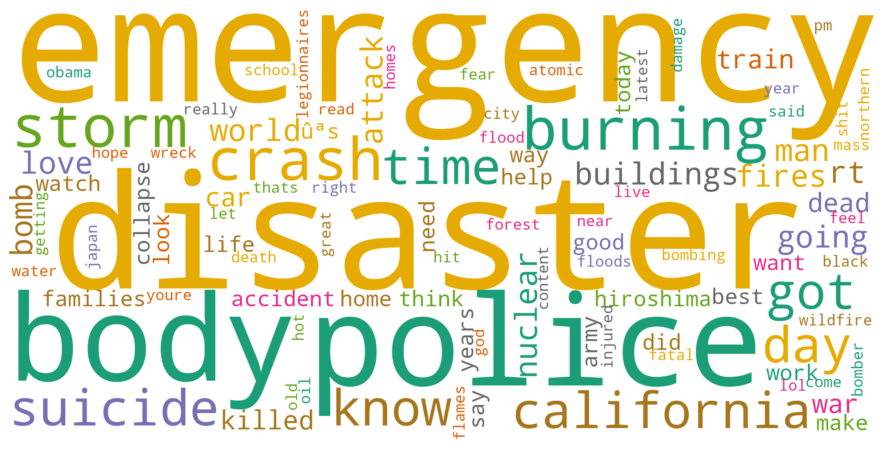

In [104]:
plt.figure(figsize = (16,8))

'''La instancia wc de WordCloud puede generar la nube a partir de la frecuencia
de las palabras. Pero para eso necesita un dictionario con las frecuencias.'''

wc.generate_from_frequencies(dictionary)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.show()

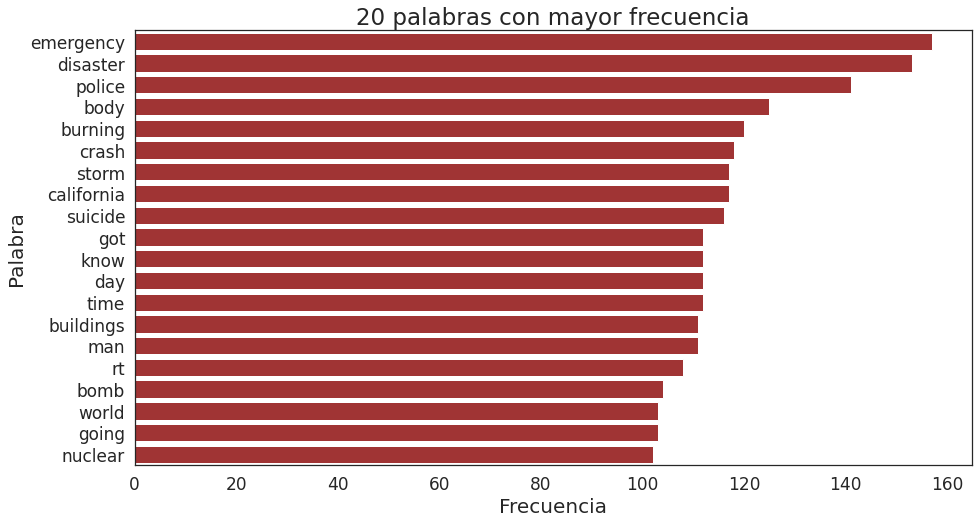

In [105]:
plt.figure(figsize=(15,8))

kw = words_freq_des.index[0:20]
counts = words_freq_des['count'].head(20)

plot = sns.barplot(x = counts, y = kw, orient = 'h', color='firebrick')
plt.title('20 palabras con mayor frecuencia', fontsize=23)
plt.xticks(fontsize=17, rotation=0)
plt.yticks(fontsize=17)
plt.xlabel('Frecuencia', fontsize=20)
plt.ylabel('Palabra', fontsize=20)

plt.show()

## Generación de Word Cloud para las keywords

In [106]:
df_cleaned['keyword'].nunique()

221

In [107]:
df_cleaned['keyword'].value_counts()[0:20]

fatalities     45
armageddon     42
deluge         42
harm           41
sinking        41
body%20bags    41
damage         41
collided       40
fear           40
windstorm      40
siren          40
twister        40
evacuate       40
outbreak       40
wreckage       39
weapons        39
whirlwind      39
weapon         39
earthquake     39
sinkhole       39
Name: keyword, dtype: int64

Algunas keywords aparecen con `%20`. Veamos qué son.

In [108]:
df_cleaned.loc[df_cleaned['keyword'].str.contains('%20', na=False)]['keyword'].value_counts()

body%20bags              41
oil%20spill              38
burning%20buildings      37
nuclear%20reactor        36
dust%20storm             36
cliff%20fall             36
structural%20failure     35
suicide%20bomb           35
airplane%20accident      35
bridge%20collapse        35
emergency%20plan         35
buildings%20burning      35
heat%20wave              34
loud%20bang              34
natural%20disaster       34
nuclear%20disaster       34
fire%20truck             33
violent%20storm          33
suicide%20bombing        33
emergency%20services     33
blew%20up                33
body%20bag               33
body%20bagging           33
buildings%20on%20fire    33
mass%20murder            33
blown%20up               33
chemical%20emergency     33
mass%20murderer          32
forest%20fires           32
suicide%20bomber         31
wild%20fires             31
first%20responders       29
bush%20fires             25
war%20zone               24
forest%20fire            19
radiation%20emergenc

Todos estos casos parecen necesitar un guión `-` en lugar de `%20`.

In [109]:
df_cleaned.replace(to_replace={'%20':'-'}, inplace=True, regex=True)
# regex=True para reemplazar expresiones dentro del string.

Se genera el diccionario con las palabras corregidas.

In [110]:
# value_counts() devuelve una Serie ordenada de forma descendente.
# También ignora los NaN
dict_keywords = df_cleaned['keyword'].value_counts().to_dict()
dict_keywords

{'fatalities': 45,
 'deluge': 42,
 'armageddon': 42,
 'damage': 41,
 'harm': 41,
 'sinking': 41,
 'body-bags': 41,
 'outbreak': 40,
 'siren': 40,
 'collided': 40,
 'twister': 40,
 'fear': 40,
 'evacuate': 40,
 'windstorm': 40,
 'hellfire': 39,
 'weapon': 39,
 'famine': 39,
 'flames': 39,
 'weapons': 39,
 'sunk': 39,
 'explosion': 39,
 'derailment': 39,
 'wreckage': 39,
 'whirlwind': 39,
 'sinkhole': 39,
 'wrecked': 39,
 'earthquake': 39,
 'collision': 39,
 'thunder': 38,
 'bombed': 38,
 'oil-spill': 38,
 'deaths': 38,
 'blaze': 38,
 'hurricane': 38,
 'ambulance': 38,
 'upheaval': 38,
 'flooding': 38,
 'fire': 38,
 'typhoon': 38,
 'drowned': 38,
 'explode': 38,
 'derailed': 38,
 'injury': 38,
 'fatal': 38,
 'sandstorm': 37,
 'ruin': 37,
 'police': 37,
 'mudslide': 37,
 'fatality': 37,
 'wreck': 37,
 'debris': 37,
 'burning-buildings': 37,
 'crush': 37,
 'bioterror': 37,
 'emergency': 37,
 'curfew': 37,
 'blizzard': 37,
 'pandemonium': 37,
 'wounded': 37,
 'panic': 37,
 'destroy': 37,
 '

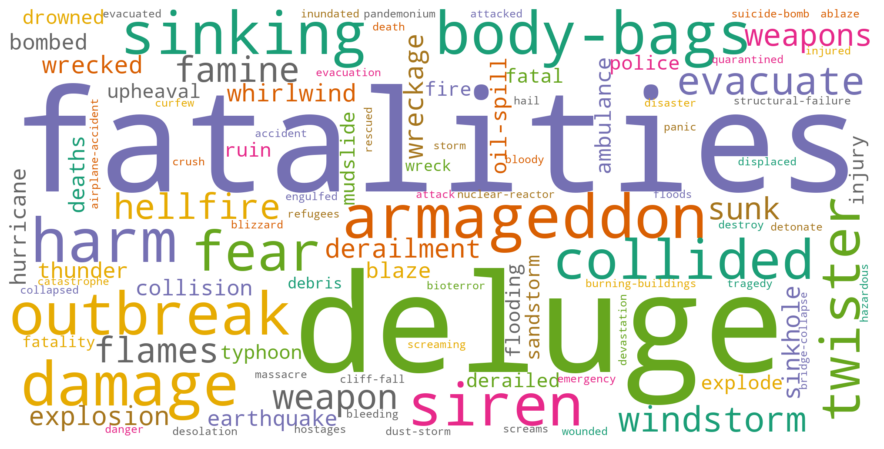

In [111]:
plt.figure(figsize = (16,8))

wc.generate_from_frequencies(dict_keywords)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.show()

In [112]:
keywords_freq = df_cleaned['keyword'].value_counts().head(20)
keywords_freq.head(5)

fatalities    45
deluge        42
armageddon    42
damage        41
harm          41
Name: keyword, dtype: int64

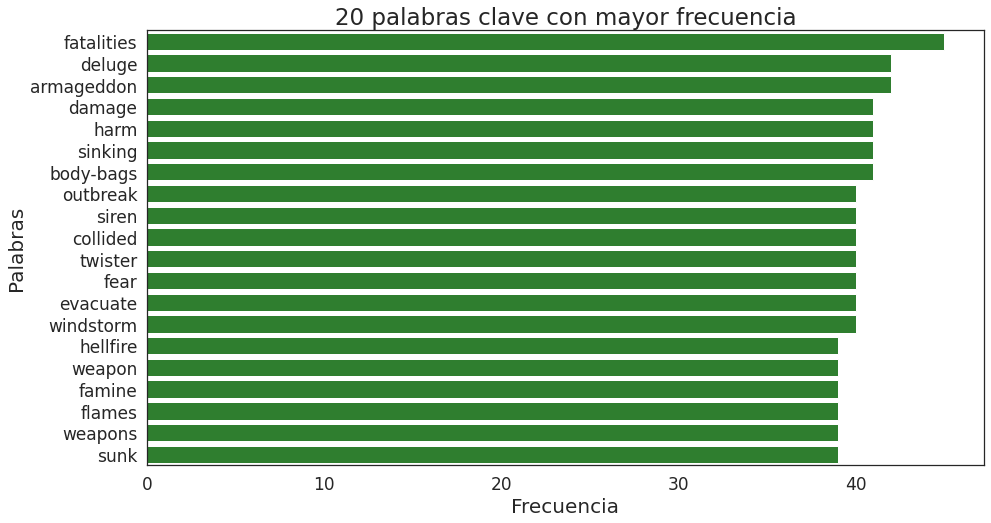

In [113]:
plt.figure(figsize=(15,8))

kw = keywords_freq.index
counts = keywords_freq.values

plot = sns.barplot(x = counts, y = kw, orient = 'h', color='forestgreen')
plt.title('20 palabras clave con mayor frecuencia', fontsize=23)
plt.xticks(fontsize=17, rotation=0)
plt.yticks(fontsize=17)
plt.xlabel('Frecuencia', fontsize=20)
plt.ylabel('Palabras', fontsize=20)

plt.show()

## Análisis de veracidad del mensaje según su longitud

In [114]:
# Se agrega un columna para la longitud del mensaje.
df['length'] = df['text'].str.len()
# Se informan las mediciones pedidas.
print('Características de longitud del texto del mensaje')
print('Máxima:', df['length'].max(), \
'\tMínina:', df['length'].min(), \
'\tMedia:', np.round(df['length'].mean(), decimals = 0))

Características de longitud del texto del mensaje
Máxima: 157 	Mínina: 7 	Media: 101.0


In [115]:
# Se arma nuevo DataFrame agrupando por longitud de mensaje
join = pd.DataFrame()
join['is_true'] = df.groupby('length')['target'].agg('sum')
join['total'] = df.groupby('length')['target'].agg('count')
join['portion_is_true'] = round(join['is_true'] / join['total'], 3)

# Se quitan los casos extremos.
clean = join.loc[join['portion_is_true'] < 1]
clean = clean.loc[clean['portion_is_true'] > 0]

# Se quitan los casos con pocas ocurrencias. Tienen que tener más de 10.
clean = clean.loc[clean['total'] > 10]
display(clean.nlargest(5, 'portion_is_true'))

print('Promedio de las cinco longitudes con mejor índice de veracidad:', \
clean.nlargest(5, 'portion_is_true').index.values.mean())
print('Mediana de las cinco longitudes con mejor índice de veracidad:', \
np.median(clean.nlargest(5, 'portion_is_true').index.values))

,is_true,total,portion_is_true
length,,,
136,277.0,401,0.691
91,60.0,88,0.682
135,119.0,191,0.623
116,40.0,67,0.597
137,125.0,210,0.595


Promedio de las cinco longitudes con mejor índice de veracidad: 123.0
Mediana de las cinco longitudes con mejor índice de veracidad: 135.0


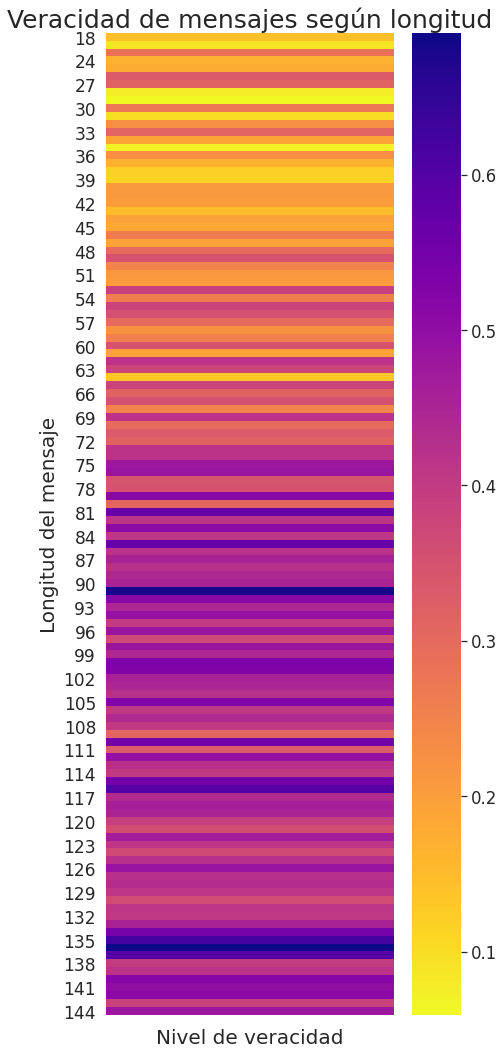

In [116]:
plt.figure(figsize = (7,15))
sns.set(font_scale = 1.5)
plot = sns.heatmap(clean[['portion_is_true']], \
                   cmap = 'plasma_r', \
                   cbar = True, \
                   xticklabels = [''])
plt.title('Veracidad de mensajes según longitud',fontsize = 25)
plot.set_xlabel('Nivel de veracidad', fontsize = 20)
plot.set_ylabel('Longitud del mensaje', fontsize = 20)
plt.xticks(fontsize = 17, rotation = 0, ha = 'center', va = 'top')
plt.yticks(fontsize = 17, rotation = 0)
plt.tight_layout() # Para que no recorte los títulos.
plt.show()

## Variables estadísticas según lugar

In [117]:
df_group_by_location = pd.DataFrame()
df_group_by_location['count'] = df.groupby('location')['location'].agg('count')
df_group_by_location['length_mean'] = round(df.groupby('location')['length'].mean(), 2)
df_group_by_location['length_median'] = df.groupby('location')['length'].median()
df_group_by_location['proportion_true'] = round(df.groupby('location')['target'].sum() / df_group_by_location['count'], 2)
df_group_by_location.sample(5, random_state=42)

,count,length_mean,length_median,proportion_true
location,,,,
Born in Baltimore Living in PA,1,95.00,95.0,0.00
"Plano, Texas",1,87.00,87.0,0.00
"Columbia Heights, MN",1,130.00,130.0,0.00
"Johannesburg, South Africa",1,119.00,119.0,0.00
"Manhattan, NY",3,91.67,87.0,0.33


In [118]:
df_group_by_location = df_group_by_location.nlargest(20, 'count')
df_group_by_location.sort_values(by='length_mean', ascending=True, inplace=True)
df_group_by_location

,count,length_mean,length_median,proportion_true
location,,,,
Everywhere,15,89.00,92.0,0.20
United States,50,100.02,100.0,0.54
India,24,102.92,107.5,0.83
Canada,29,105.86,112.0,0.45
California,17,106.18,114.0,0.41
"New York, NY",15,106.87,112.0,0.47
London,45,107.11,119.0,0.36
Worldwide,19,108.21,106.0,0.63
USA,104,108.51,106.0,0.64


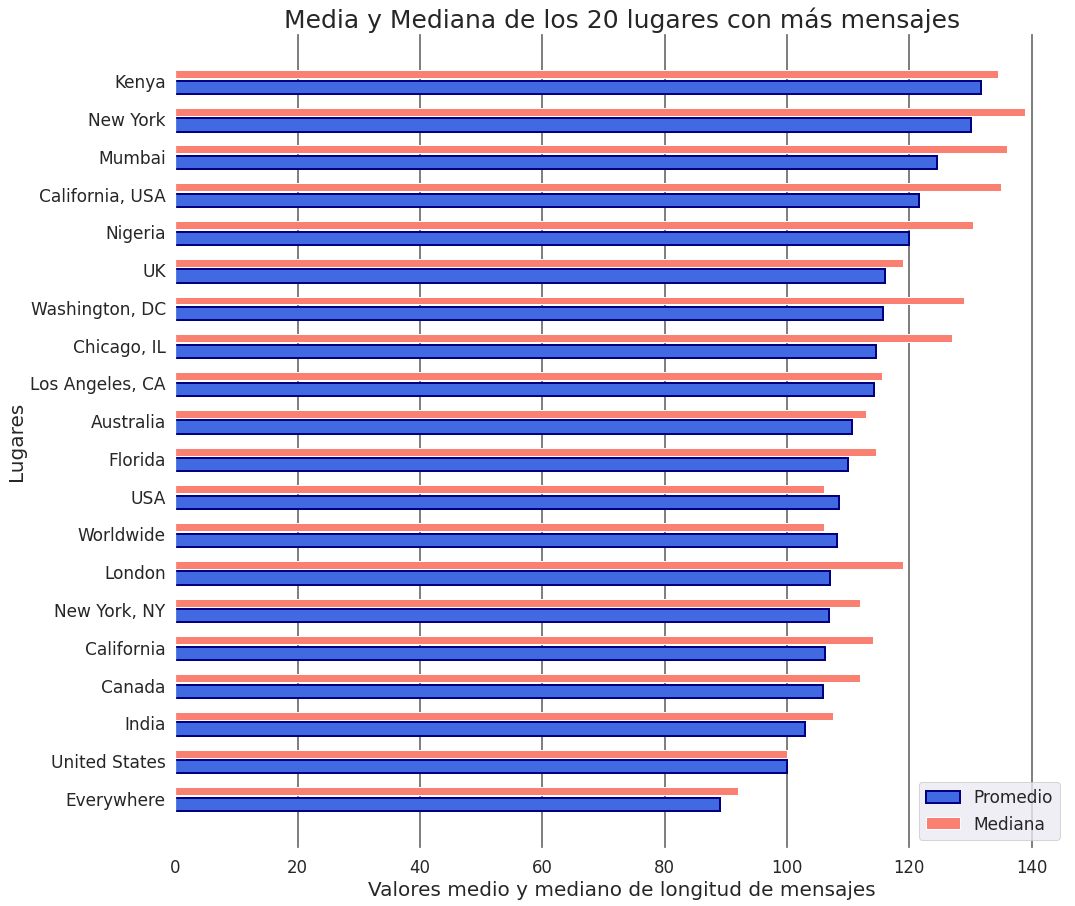

In [119]:
labels = df_group_by_location.index
mean = df_group_by_location['length_mean']
median = df_group_by_location['length_median']

y = np.arange(len(labels))  # ubicación de labels - orden
height = 0.35  # ancho de barras

fig, ax =plt.subplots(figsize=(16,15)) 
rects1 = ax.barh(y - height/2, mean, height, \
                 facecolor='royalblue', edgecolor='navy', linewidth=2, \
                 label='Promedio')
rects2 = ax.barh(y + height/2, median, height*0.6, \
                 color='salmon', \
                 label='Mediana')

ax.set_xlabel('Valores medio y mediano de longitud de mensajes', fontsize=20)
ax.set_ylabel('Lugares', fontsize=20)
ax.set_title('Media y Mediana de los 20 lugares con más mensajes', fontsize=25)
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=17, rotation = 0, ha = 'right')
ax.legend(fontsize=17)
ax.grid(False) # Desabilita la grilla inicial
ax.grid(axis='x', color='grey', linewidth=2)
ax.set_facecolor('white') # Da color al fondo

plt.show()

En general la mediana se encuentra por encima del promedio y cuando esto no ocurre, los valores son parecidos.